In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table("fruits_data_with_colors.txt")

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [8]:
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

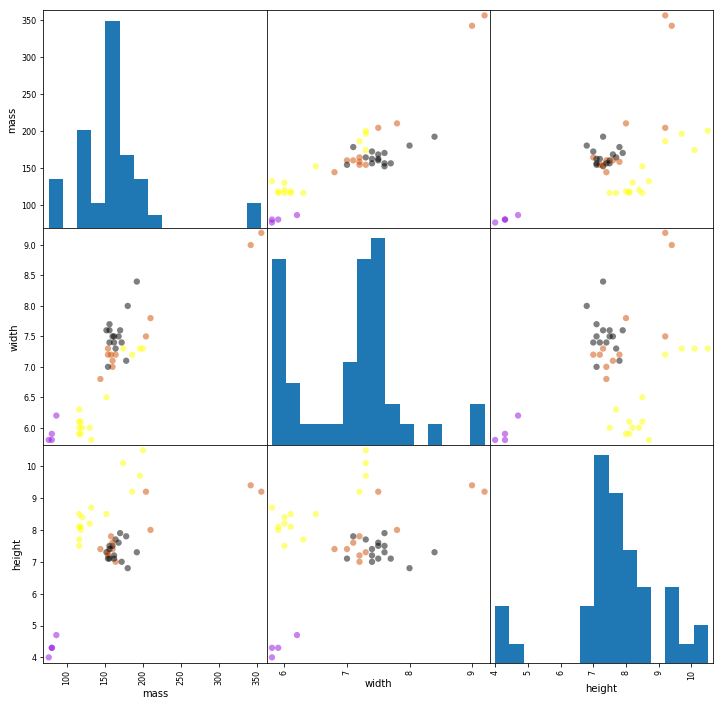

In [15]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')

scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12),cmap=cmap)

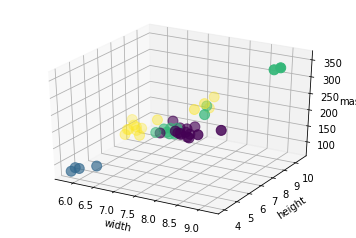

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['mass'], c= y_train, marker = 'o', s = 100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('mass')
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
knn.score(X_test, y_test)

0.5333333333333333

In [34]:
fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [38]:
fruit_prediction = knn.predict([[120,2.3,11.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [40]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')

ModuleNotFoundError: No module named 'adspy_shared_utilities'